ALGORITMO K-MEANS

---


Para este análisis, utilizaremos como fuente un dataset obtenido en Kaggle, el que corresponde a las ventas de un supermercado por categoria.

OBJETIVO

El objetivo es agrupar los datos para visualizar las categorías de productos que han sido compradas juntas. Por ejemplo: Si una persona compra algún comestible muy probablemente también comprará algun producto de la categoría lácteos, por lo tanto, en las góndolas de los supermercados, estos productos se pueden poner juntos. Esto permite aportar información al administrador de un supermercado sobre la disposición de los productos en la tienda.

LIBRERIAS USADAS
- PANDAS: Para trabajar con datos númericos
- MISSINGNO: Para búsqueda de missing values
- SKLEARN: Para aplicar algoritmo Kmeans
- MATPLOTLIB: Para la elaboración de gráficos.

In [1]:
# Se comienzan importando las librerías que se usaran en python. 
import pandas as pd
import numpy as np
import missingno as msno
import sklearn as sk
import matplotlib.pyplot as plt


In [2]:
# El dataset obtenido de kaggle es subido a un Worksheet de Google Drive. 
# Enlace: (https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set?resource=download)
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1A1pSs9CaCQmV724EfGNtPvcKhVsOmU5VJlGPs-5k_KY/export?format=csv")


DESCRIPCIÓN DE VARIABLES
---


*   CHANNEL: Corresponde al canal de ventas, hoteles, restaurantes, cafetería, o ventas al detalle.
*   REGIÓN: Corresponde a la ubicación geográfica donde se efectuó la venta.
*   FRESH: Productos frescos, tales como: frutas y verduras.
*   MILK: Productos lácteos
*   GROCERY: Productos comestibles, abarrotes.
*   FROZEN: Productos congelados.
*   DETERGENTS_PAPER: Detergentes
*   DELICATESSEN: Productos gourmet.






In [3]:
# Conocer las 5 primeras filas de las columnas del dataset.
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Permite evaluar los datos faltantes y el tipo de dato del dataset.
df.info()
# El dataset no posee missing values, y además, todos sus datos son del tipo ENTERO. Por lo tanto, no requiere un preprocesamiento de sus datos.
# La base de datos contiene 440 filas y 8 columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# Se seleccionan datos al azar, que serán utilizados como muestras y se almacenan en la variable MUESTRAS.
indices = [50,102,267,341,400]
muestras = pd.DataFrame(df.loc[indices],
                        columns= df.keys()).reset_index(drop= True)
muestras # Es la variable en donde están almacenados las 3 filas que permitirán evaluar la clasificación del modelo

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,6269,1095,1980,3860,609,2162
1,2,3,2932,6459,7677,2561,4573,1386
2,1,1,20893,1222,2576,3975,737,3628
3,2,3,2320,5763,11238,767,5162,2158
4,1,3,4446,906,1238,3576,153,1014


In [6]:
# Se analizan brevemente los datos para profundizar en cada uno de ellos y entender el contexto del problema
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Channel                 582
Region                 1119
Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicassen           670943
dtype: int64

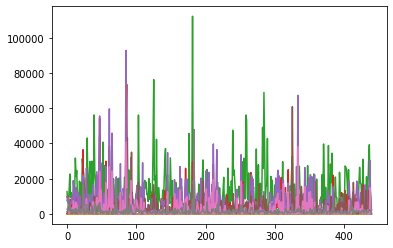

In [7]:
plt.plot(df)
df.sum()
# Los productos mayor vendidos son los siguientes: Fresh > Grocery > Milk > Frozen > Detergents_Paper > Delicassen

PREPROCESAMIENTO DE LOS DATOS


---

Se realizarán dos métodos para el preprocesamiento de los datos.

*   Eliminar columnas que no se relacionan con el objetivo del análisis K-means
*   Escalamiento de los datos (Usando Normalizer)







In [8]:
# Eliminar las variables Region y Channel del DATAFRAME, que no aportan información útil para el algoritmo k-means, ya que para este análisis no se considera ni la ubicación ni el canal de ventas.
df = df.drop(['Region','Channel'], axis = 1)
# Axis 0 borra filas, y axis 1, borra columnas.

In [9]:
# Para evitar que el modelo se entrene con las muestras, se proceden a eliminar del dataset.
muestras = muestras.drop(['Region','Channel'], axis = 1)

In [10]:
# Debido a que los datos son muy variables, se procede a Normalizar, creando una variable llamanda df.escalada y muestras.escalada
from sklearn import preprocessing
df.escalada = preprocessing.Normalizer().fit_transform(df)
muestras.escalada = preprocessing.Normalizer().fit_transform(muestras)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [11]:
muestras.escalada = pd.DataFrame(muestras.escalada)
muestras.escalada

,0,1,2,3,4,5
0,0.781403,0.136487,0.246798,0.481132,0.075909,0.269484
1,0.249008,0.548549,0.651991,0.217500,0.388375,0.117710
2,0.959493,0.056119,0.118301,0.182548,0.033846,0.166613
3,0.165386,0.410828,0.801124,0.054677,0.367984,0.153838
4,0.741414,0.151084,0.206449,0.596333,0.025514,0.169094


In [12]:
df.escalada = pd.DataFrame(df.escalada)
df.escalada

,0,1,2,3,4,5
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
...,...,...,...,...,...,...
435,0.776890,0.315197,0.419191,0.343549,0.004760,0.057646
436,0.990872,0.036146,0.019298,0.113919,0.002349,0.059258
437,0.364462,0.388465,0.758545,0.010961,0.372237,0.046827
438,0.937737,0.180530,0.203404,0.094594,0.015310,0.193653


In [13]:
# ANALISIS DE MACHINE LEARNING
# Se importa la K-means de la librería de Sckitlearn
from sklearn.cluster import KMeans

In [14]:
# Se determinan las variables a evaluar
x = df.escalada.copy()

In [15]:
# Hallar el valor óptimo de K
# Se aplicará el método de codo para hallar la K
# Se calcula el algoritmo de agrupación para diferentes valores de K
inercia = []
for i in range(1,20):
  algoritmo = KMeans(n_clusters = i, init = 'k-means++',
                     max_iter = 300, n_init = 10)
  algoritmo.fit(x)
  # Para cada K, se calcula la suma total del cuadrado dentro del clúster
  inercia.append(algoritmo.inertia_)

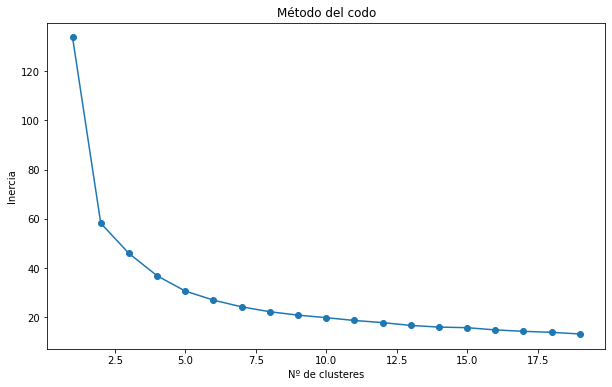

In [16]:
# Se traza la curva de la suma de los errores cuadráticos
plt.figure(figsize=[10,6])
plt.title('Método del codo')
plt.xlabel('Nº de clusteres')
plt.ylabel('Inercia')
plt.plot(list(range(1,20)),inercia, marker ='o')
plt.show()

In [17]:
algoritmo = KMeans(n_clusters=6, init = 'k-means++',
                   max_iter = 300, n_init = 10)

In [18]:
# Se entrena el modelo
algoritmo.fit(x)

KMeans(n_clusters=6)

In [19]:
# Se obtienen los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [20]:
muestra_prediccion = algoritmo.predict(df.escalada)

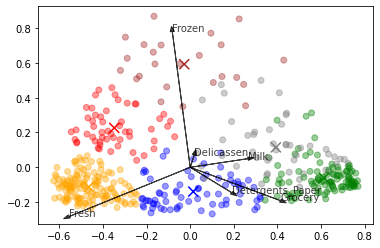

In [21]:
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(x)
pca = modelo_pca.transform(x) 

# Se aplica al reducción de dimensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

# Se definen los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown']

# Se asignan los colores a cada clúster
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

# Se grafícan los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

# Se grafícan los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)

# Posteriormente, se guardan los datos en una variable para que sea más fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = df.columns

# Se grafícan los nombres de los clústers con la distancia del vector
for i in range(len(columnas)):
  # Se grafícan los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
# Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)
plt.show()

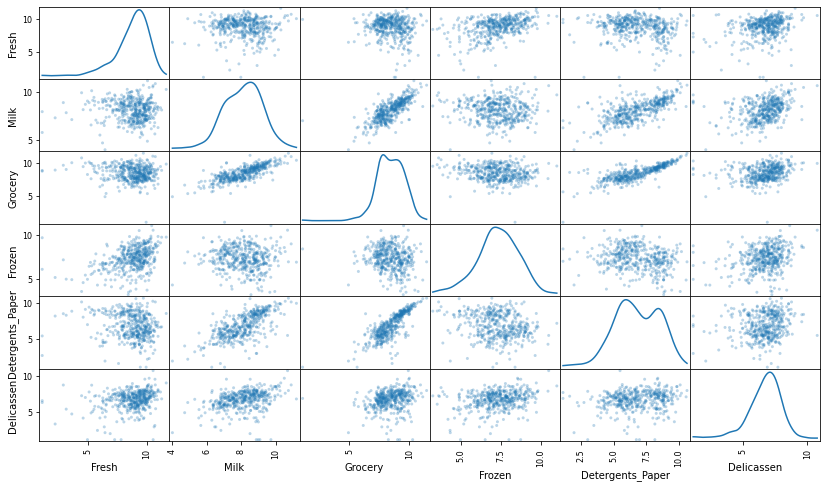

In [22]:
from pandas.plotting import scatter_matrix
log_data = np.log(df)
log_samples = np.log(muestras)
scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
# Se observa una relacion lineal fuerte entre MILK/GROCERY y DETERGENTS_PAPER/GROCERY y suave entre MILK/DETERGENTS_PAPER.

CONCLUSIÓN


---
Finalmente, se obtienen 6 distintos clústers los que están representados por distintos colores, en donde la X corresponde a los centroides de cada clúster.
Algunos clúster se encuentran agrupados y concentrados en un sólo lugar, mientras que el resto están dispersos y mezclados entre sí.
Las flechas del gráfico representan el nivel de importancia de cada característica en la escala multidimensional. 
Por lo tanto, se concluye que los productos FRESH y FROZEN no están muy relacionados con el resto, es decir, no es tan probable que una persona que compra GROCERY, tambien lleve FRESH y FROZEN. Por lo tanto, estos dos productos pueden ser colocados por separado.
Mientras que los productos GROCERY, DETERGENTS_PAPER y MILK, muetran una fuerte relación entre ellos, por lo que se recomienda sean puestos cercanos los unos con los otros, para de esta forma aumentar las ventas, ó en su defecto, que el cliente compre más en menos tiempo.
